In [1]:
from Analysis.Helper import AudioAnalysisInput
import pandas as pd
import datetime as datetime
import os
import seaborn as sns; sns.set()

In [2]:
# load data

In [3]:
end = datetime.datetime(2019,5,20)
start = end - datetime.timedelta(days=365)

aai = AudioAnalysisInput(start=start,end=end)

# save down snapshot of the data
now_dt = datetime.datetime.now().strftime("%Y%m%d")
snap = 'pre_processed_data_20180519to20190517_proc{}.xlsx'.format(now_dt)
if not os.path.exists(snap):
    aai.data.to_excel(snap,index=False)

/Users/brianesmith/Desktop/podcast/Analysis/Helper.py:47: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  dates_to_load = pd.DatetimeIndex(start=self.start,end=self.end,freq="D")


In [15]:
aai.data.to_excel(snap,index=False)

In [4]:
# process data for initial viz

In [5]:
data2 = aai.data.copy()
data2 = data2[~data2['batch_skip_ind']]
data_agg = data2.pivot_table(values="network",index=["dur_bin","PoD_played",'frequency','category'],aggfunc="count")
# data_agg = data2.pivot_table(values="duration",index=["dur_bin","PoD_played",'frequency','category'],aggfunc="sum")

data_agg = data_agg.reset_index()

# data_agg["bin"]=data_agg.apply(lambda x: "{}-{}-end".format(x['dur_bin'][3:],x['PoD_played'][3:]),axis=1)
data_agg["bin"]=data_agg.apply(lambda x: "{}-{}-{}-{}".format(x['dur_bin'][3:],
                                                           x['frequency'],
                                                           x['PoD_played'][3:],
                                                           x['category'],
                                                  ),axis=1)
# data_agg[['bin','network']].to_csv('Viz/binned_data.csv',index=False)

In [34]:
trend_in_one = data2[["PoD_played","dur_bin","datePlayed_date",'network']].pivot_table(index=["PoD_played","dur_bin"],columns=['datePlayed_date']\
                                           ,aggfunc="count",values="network")

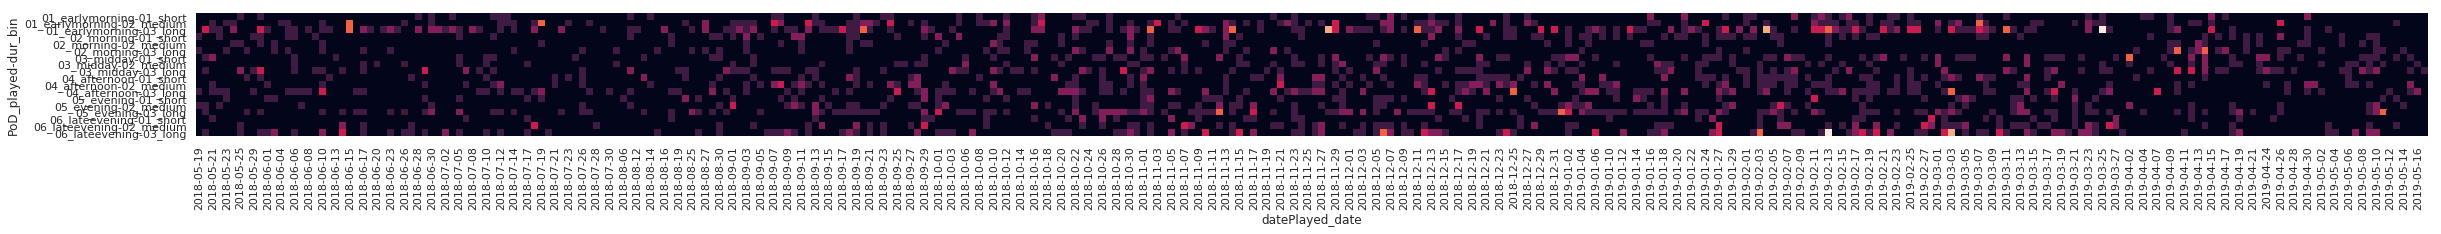

In [40]:
sns.set(rc={"figure.figsize":(40,20)})
# sns.heatmap(trend_in_one.fillna(0),cbar=False,square=True,)
pt = sns.heatmap(trend_in_one.fillna(0),cbar=False,square=True,)

In [7]:
data2.columns

Index(['name', 'dateReleased', 'duration', 'album', 'artist', 'composer',
       'genre', 'playedCount', 'datePlayed', 'dateAdded', 'year',
       'descriptionShort', 'reportRunDate', 'played_weekend_ind',
       'played_holiday_ind', 'release_to_play_seconds',
       'release_to_add_seconds', 'add_to_play_seconds', 'datePlayed_date',
       'datePlayed_monthcd', 'datePlayed_weekcd', 'category', 'frequency',
       'network', 'default_duration', 'PoD_played', 'dur_bin',
       'single_skip_ind', 'batch_skip_ind'],
      dtype='object')

In [8]:
played_u = data2['PoD_played'].unique()
dur_u = data2['dur_bin'].unique()

In [17]:
splits = {
        "date":"daily",
        "weekcd":"weekly",
        "monthcd":"monthly"
}

./TimeLapse_Viz2/daily/20180519(120ms).png
./TimeLapse_Viz2/daily/20180520(240ms).png
./TimeLapse_Viz2/daily/20180521(360ms).png
./TimeLapse_Viz2/daily/20180522(480ms).png
./TimeLapse_Viz2/daily/20180523(600ms).png
./TimeLapse_Viz2/daily/20180524(720ms).png
./TimeLapse_Viz2/daily/20180525(840ms).png
./TimeLapse_Viz2/daily/20180526(960ms).png
./TimeLapse_Viz2/daily/20180529(1080ms).png
./TimeLapse_Viz2/daily/20180531(1200ms).png
./TimeLapse_Viz2/daily/20180601(1320ms).png
./TimeLapse_Viz2/daily/20180603(1440ms).png
./TimeLapse_Viz2/daily/20180604(1560ms).png
./TimeLapse_Viz2/daily/20180605(1680ms).png
./TimeLapse_Viz2/daily/20180606(1800ms).png
./TimeLapse_Viz2/daily/20180607(1920ms).png
./TimeLapse_Viz2/daily/20180608(2040ms).png
./TimeLapse_Viz2/daily/20180609(2160ms).png
./TimeLapse_Viz2/daily/20180610(2280ms).png
./TimeLapse_Viz2/daily/20180611(2400ms).png
./TimeLapse_Viz2/daily/20180613(2520ms).png
./TimeLapse_Viz2/daily/20180614(2640ms).png
./TimeLapse_Viz2/daily/20180615(2760ms).

./TimeLapse_Viz2/daily/20181218(22320ms).png
./TimeLapse_Viz2/daily/20181219(22440ms).png
./TimeLapse_Viz2/daily/20181220(22560ms).png
./TimeLapse_Viz2/daily/20181221(22680ms).png
./TimeLapse_Viz2/daily/20181222(22800ms).png
./TimeLapse_Viz2/daily/20181223(22920ms).png
./TimeLapse_Viz2/daily/20181224(23040ms).png
./TimeLapse_Viz2/daily/20181225(23160ms).png
./TimeLapse_Viz2/daily/20181226(23280ms).png
./TimeLapse_Viz2/daily/20181227(23400ms).png
./TimeLapse_Viz2/daily/20181228(23520ms).png
./TimeLapse_Viz2/daily/20181229(23640ms).png
./TimeLapse_Viz2/daily/20181230(23760ms).png
./TimeLapse_Viz2/daily/20181231(23880ms).png
./TimeLapse_Viz2/daily/20190101(24000ms).png
./TimeLapse_Viz2/daily/20190102(24120ms).png
./TimeLapse_Viz2/daily/20190103(24240ms).png
./TimeLapse_Viz2/daily/20190104(24360ms).png
./TimeLapse_Viz2/daily/20190105(24480ms).png
./TimeLapse_Viz2/daily/20190106(24600ms).png
./TimeLapse_Viz2/daily/20190107(24720ms).png
./TimeLapse_Viz2/daily/20190110(24840ms).png
./TimeLaps

./TimeLapse_Viz2/weekly/2019_10(5280ms).png
./TimeLapse_Viz2/weekly/2019_11(5400ms).png
./TimeLapse_Viz2/weekly/2019_12(5520ms).png
./TimeLapse_Viz2/weekly/2019_13(5640ms).png
./TimeLapse_Viz2/weekly/2019_14(5760ms).png
./TimeLapse_Viz2/weekly/2019_15(5880ms).png
./TimeLapse_Viz2/weekly/2019_16(6000ms).png
./TimeLapse_Viz2/weekly/2019_17(6120ms).png
./TimeLapse_Viz2/weekly/2019_18(6240ms).png
./TimeLapse_Viz2/weekly/2019_19(6360ms).png
./TimeLapse_Viz2/weekly/2019_20(6480ms).png
./TimeLapse_Viz2/monthly/2018_05(120ms).png
./TimeLapse_Viz2/monthly/2018_06(240ms).png
./TimeLapse_Viz2/monthly/2018_07(360ms).png
./TimeLapse_Viz2/monthly/2018_08(480ms).png
./TimeLapse_Viz2/monthly/2018_09(600ms).png
./TimeLapse_Viz2/monthly/2018_10(720ms).png
./TimeLapse_Viz2/monthly/2018_11(840ms).png
./TimeLapse_Viz2/monthly/2018_12(960ms).png
./TimeLapse_Viz2/monthly/2019_01(1080ms).png
./TimeLapse_Viz2/monthly/2019_02(1200ms).png
./TimeLapse_Viz2/monthly/2019_03(1320ms).png
./TimeLapse_Viz2/monthly/2019

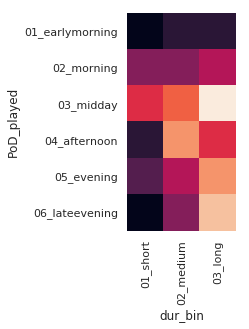

In [18]:
for split in splits.keys():
    out_dir = splits[split]
    i = 0
    for date in data2["datePlayed_"+split].unique():
#         print(date)
        seci = 120 + (i*120)
        if split in ['weekcd','monthcd']:
            out_img = os.path.join(".",r"TimeLapse_Viz2/{}/{}({}ms).png".format(out_dir,date,str(seci)))
        else:
            out_img = os.path.join(".",date.strftime(r"TimeLapse_Viz2/{}/%Y%m%d({}ms).png".format(out_dir,str(seci))))
        filt_df = data2[data2["datePlayed_"+split]==date]

        filt_df_piv = filt_df[["PoD_played","dur_bin",'network']].pivot_table(index=["PoD_played"],columns=["dur_bin"]\
                                               ,aggfunc="count",values="network")
        # fill in missing values
        for p in played_u:
            for d in dur_u:

                try:
                    filt_df_piv.loc[p,d].item()
                except:
                    filt_df_piv.loc[p,d]=0
        ax = sns.heatmap(filt_df_piv.fillna(0),cbar=False,square=True)
        figure = ax.get_figure()    
        figure.savefig(out_img, dpi=400)
#         print(out_img)

        i+=1

In [19]:
filt_df_piv

dur_bin,01_short,02_medium,03_long
PoD_played,,,
01_earlymorning,NaN,1.0,1.0
02_morning,3.0,3.0,4.0
03_midday,5.0,6.0,9.0
04_afternoon,1.0,7.0,5.0
05_evening,2.0,4.0,7.0
06_lateevening,NaN,3.0,8.0
